# Set up the book data
- This file reads in the FB Gutenberg data and the Montag 100 picture books data. 
- Then it sets up the age categories. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the books data with ages 
dfmontag = pd.read_csv("dfmontag.csv")
dfgut = pd.read_csv("dfgut.csv")

In [7]:
dfmontag.head()

,Title,Author,Text,Age,minAge,maxAge
0,"Bark, George",Jules Feiffer,"George’s mother said: ""Bark, George."" George ...",0,4,8
1,Blueberries for Sal,Robert McCloskey,"One day, Little Sal went with her mother to B...",0,3,7
2,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr,"Brown Bear, Brown Bear, What do you see? I se...",0,2,5
3,"Click, Clack, Moo Cows that Type",Doreen Cronin,Farmer Brown has a problem. His cows like to ...,0,5,7
4,Cloudy With a Chance of Meatballs,Judi Barrett,We were all sitting around the big kitchen ta...,0,4,8


In [8]:
dfgut.head()

,Title,Author,Text,Age,minAge,maxAge
0,Prince Prigio,Andrew Lang,CHAPTER I. -LCB- Chapter heading picture : p1...,1,8,18
1,"Prince Prigio From ""His Own Fairy Book""",Andrew Lang,CHAPTER I. -- How the Fairies were not Invite...,1,8,18
2,Prince Ricardo of Pantouflia,Andrew Lang,CHAPTER I . The Troubles of King Prigio . -LC...,1,8,18
3,The Blue Fairy Book,Andrew Lang,THE BRONZE RING Once upon a time in a certain...,1,10,99
4,The Brown Fairy Book,Andrew Lang,The Brown Fairy Book What the Rose did to the...,1,8,10


### Look at the distribution of books in each dataset

Text(0.5,0,'Recommended Minimum Age')

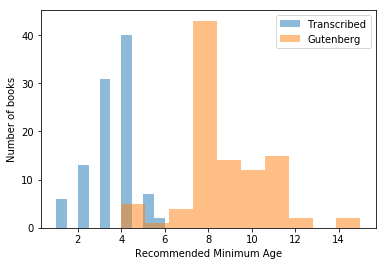

In [5]:
plt.hist(dfmontag['minAge'], alpha=0.5, label='Transcribed')
plt.hist(dfgut['minAge'], alpha=0.5, label='Gutenberg')
plt.legend(loc='upper right')
plt.ylabel('Number of books')
plt.xlabel('Recommended Minimum Age')

In [6]:
alldata = dfmontag.append(dfgut)
print(alldata['minAge'].value_counts().sort_index(), alldata.shape)

1      6
2     13
3     31
4     42
5     10
6      3
7      4
8     43
9     14
10    12
11    15
12     2
14     1
15     1
Name: minAge, dtype: int64 (197, 6)


### Rename the Age column: it tells whether the book is a picture book or a gutenberg book

In [32]:
new_columns = alldata.columns.values
new_columns

array(['Title', 'Author', 'Text', 'NotPictureBook', 'minAge', 'maxAge',
       'agecat', 'agecat2'], dtype=object)

In [33]:
new_columns[3] = 'GutenBook'
new_columns

array(['Title', 'Author', 'Text', 'GutenBook', 'minAge', 'maxAge',
       'agecat', 'agecat2'], dtype=object)

In [34]:
alldata.columns = new_columns

In [ ]:
alldata.head()

### Code in age categories

In [22]:
# code coarser and more balanced age values
# Option: 1-3, 4-7, 8+
def age_groups(series):
    if series < 4:
        return 1
    elif 4 <= series < 8:
        return 2
    elif 8 <= series:
        return 3

alldata['agecat'] = alldata['minAge'].apply(age_groups)
alldata['agecat'].value_counts().sort_index()

1    50
2    59
3    88
Name: agecat, dtype: int64

In [25]:
# Option: 1-3, 4-7, 8+
def age_groups2(series):
    if series < 6:
        return 0
    elif 6 <= series:
        return 1

alldata['agecat2'] = alldata['minAge'].apply(age_groups2)
alldata['agecat2'].value_counts()

0    102
1     95
Name: agecat2, dtype: int64

In [37]:
alldata['GutenBook'].value_counts()

0    99
1    98
Name: GutenBook, dtype: int64

In [36]:
alldata

,Title,Author,Text,GutenBook,minAge,maxAge,agecat,agecat2
75,The Cat in The Hat,Dr. Seuss,The sun did not shine. It was too wet to play...,0,3,7,1,0
30,Don’t Let the Pigeon Drive the Bus,Mo Willems,"I thought he’d never leave. Hey, can I drive...",0,2,6,1,0
31,The Napping House,Audrey Wood,"There is a house, a napping house, where ever...",0,3,99,1,0
58,The Berenstain Bears Forget Their Manners,Stan & Jan Berenstain,There was trouble in the big tree house down ...,0,3,7,1,0
91,Show Dog,Meghan McCarthy,This is Princess. She is a show dog. Here we ...,0,3,8,1,0
57,Olivia,Ian Falconer,This is Olivia. She is good at lot of things....,0,2,5,1,0
35,The Tale of Peter Rabbit,NaN,Once upon a time there were four little Rabbi...,0,3,7,1,0
36,The Story of Ferdinand,Munro Leaf,Once upon a time in Spain there was a little ...,0,3,5,1,0
73,Chicka Chicka 1-2-3,Bill Martin Jr,"1 told 2 and 2 told 3, ""I’ll race you to the ...",0,1,4,1,0
88,Angelina Ice Skates,Katharine Holabird,Angelina absolutely loved snowy winter days w...,0,3,5,1,0


### Here's our new data

In [38]:
alldata = alldata.sort_values(by=['agecat'],ascending=True)
alldata.head()

,Title,Author,Text,GutenBook,minAge,maxAge,agecat,agecat2
75,The Cat in The Hat,Dr. Seuss,The sun did not shine. It was too wet to play...,0,3,7,1,0
2,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr,"Brown Bear, Brown Bear, What do you see? I se...",0,2,5,1,0
72,Bear Wants More,Karma Wilson,"When springtime comes, in his warm winter den...",0,3,7,1,0
76,The Duckling gets a cookie!?,Mo Willems,Hello! Scooty scoot scoot! May I have a cooki...,0,2,6,1,0
5,Corduroy,Don Freeman,Corduroy is a bear who once lived in the toy ...,0,2,5,1,0


### Export the books data

In [39]:
alldata.to_csv("booksdata.csv", index=False, encoding='utf8')

### Push the books to a SQL database

In [12]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

In [13]:
#Define a database name. Set your postgres username.
dbname = 'bst'
username = 'shawnramirez'
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://shawnramirez@localhost/bst


In [14]:
## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [40]:
# push table to SQL (not useful for big data)
#export to sql
alldata.to_sql(name='booksdb', con=engine, if_exists = 'replace')

### Notes: 
- There are 197 books. 
- 'agecat' has 3 categories: 0-3, 4-7, 8+ and there are 50, 59, and 88 books in each, respectively. This is pretty much as balanced as it gets, because there are two "reading" spikes in the data. Children learn to read at a more advanced level at age 4, so many books are categorized for that age. Children's reading level at age 8 also spikes to the young adult/more advanced reader stage.  
- 'Age' represents whether the data come from the picture books (0) or Gutenberg (1) 